In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.mode.use_inf_as_na = True

In [2]:
#Read in metadate about the training objects
# size is n objects x n features
meta = pd.read_csv('training_set_metadata.csv')
print(meta.shape)
meta.head()

(7848, 12)


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [3]:
meta.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,5523.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,0.269623,0.254436,0.357885,0.155695,41.263961,0.081953,60.895387
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,0.443792,0.330053,0.545552,0.300367,2.262711,0.150598,28.767984
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,0.000000,0.000000,0.000000,0.000000,31.996100,0.003000,6.000000
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,0.000000,0.000000,0.000000,0.000000,39.845250,0.018000,42.000000
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,0.000000,0.182750,0.210300,0.018000,41.167900,0.032000,65.000000
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,1.000000,0.350125,0.431200,0.122375,42.398550,0.076000,90.000000
max,1.307798e+08,359.824219,4.181528,359.943827,65.931317,1.000000,3.445100,2.999400,1.734800,47.025600,2.747000,95.000000


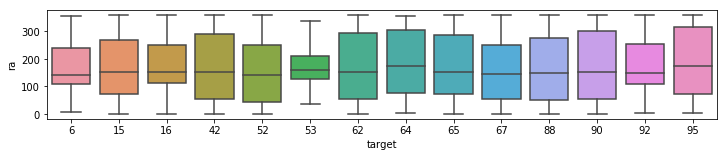

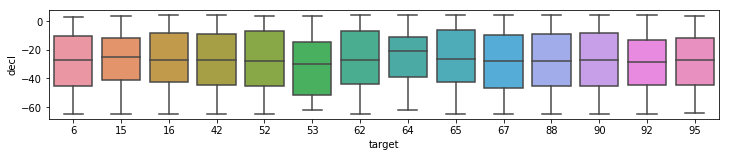

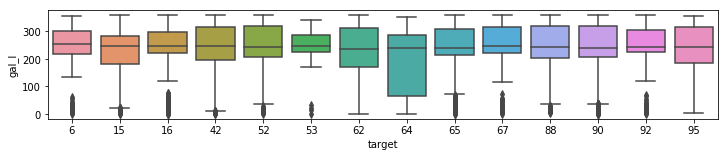

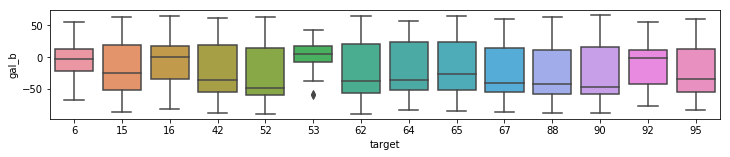

In [5]:
#ra, decl, gal_l and gal_b are all directional variables indicating
#where in the sky an object is visible. It seems like this is unlikely to be
#meaningful, but let's check if any of the 14 given classes are materially
#different in terms of sky positioning:
for y in ['ra', 'decl', 'gal_l', 'gal_b']:
    plt.figure(figsize=[12,2])
    sns.boxplot(x='target', y=y, data=meta)
    plt.show()

# Key insight: 
Objects in the Milky Way galaxy all have ['hostgal_specz'] = 0, and objects outside the galaxy have ['hostgal_specz'] != 0. 

Additionally, those two groups feed mutually exclusive groups! see below:

In [7]:
meta['extragal'] = np.where(meta.hostgal_specz>0, 1,0)

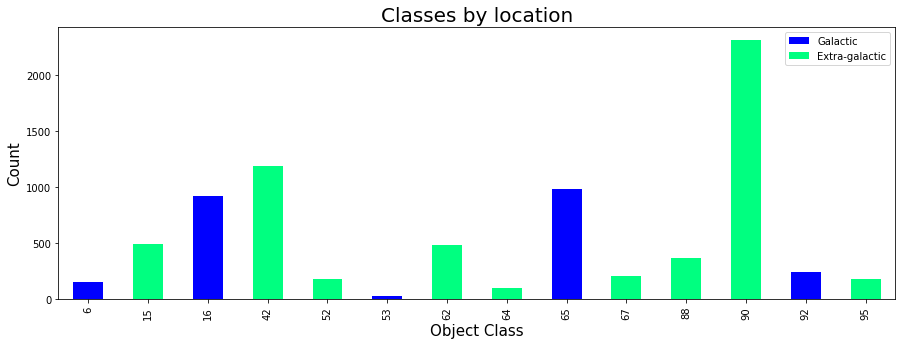

In [34]:
ct = pd.crosstab(meta.target, meta.extragal)
ctp = ct.plot.bar(stacked=True,
                 figsize=[15,5],
                 colormap='winter')
plt.legend(labels=['Galactic','Extra-galactic'])
plt.title('Classes by location', size=20)
plt.xlabel('Object Class', size=15)
plt.ylabel('Count',size=15)

plt.show()

In [9]:
#Given the above, the rest of the visualizations will be done on these 2 group separately.
extragal = meta[meta.extragal == 1]
gal = meta[meta.extragal != 1]


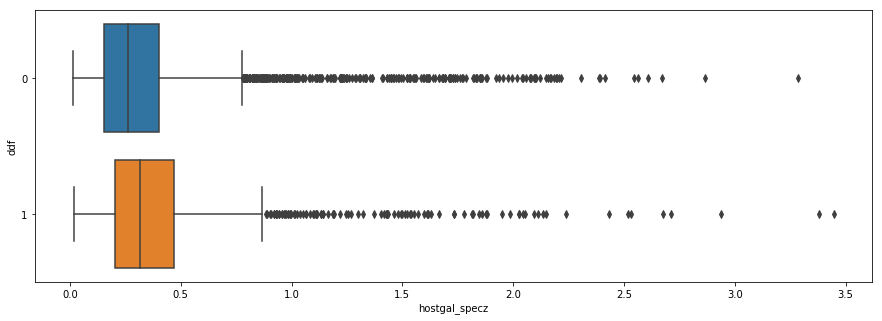

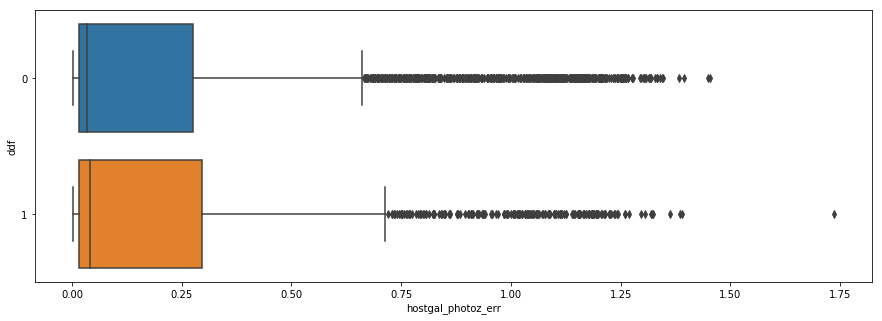

In [10]:
#For the extragalactic data, how does the hostgal measurements differ when ddf is used? How does the error differ?
plt.figure(figsize=[15,5])
sns.boxplot(y='ddf', x='hostgal_specz', data=extragal, orient='h')
plt.show()
plt.figure(figsize=[15,5])
sns.boxplot(y='ddf', x='hostgal_photoz_err', data=extragal, orient='h')
plt.show()
#Not ver insightful

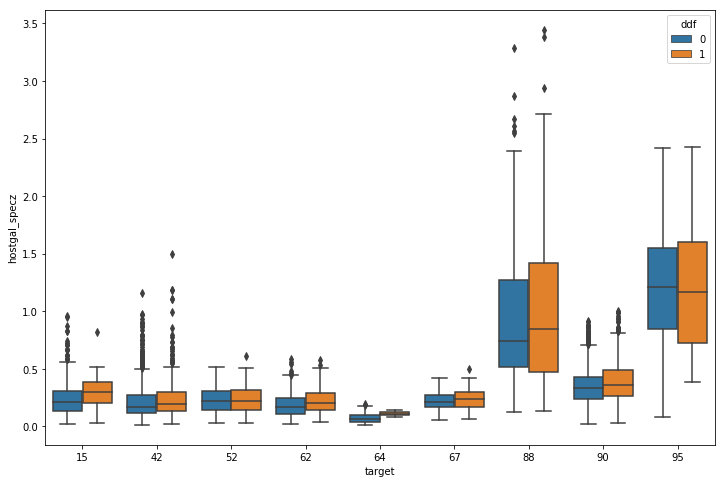

In [11]:
#Does hostgal_specz differ by class within extragal?
plt.figure(figsize=[12,8])
sns.boxplot(x='target', y='hostgal_specz', hue='ddf', data=extragal)
plt.show()
#Yes, and this makes sense intuitively, if only for the fact that some types of objects are 
#probably only visible in closer galaxies and not further ones

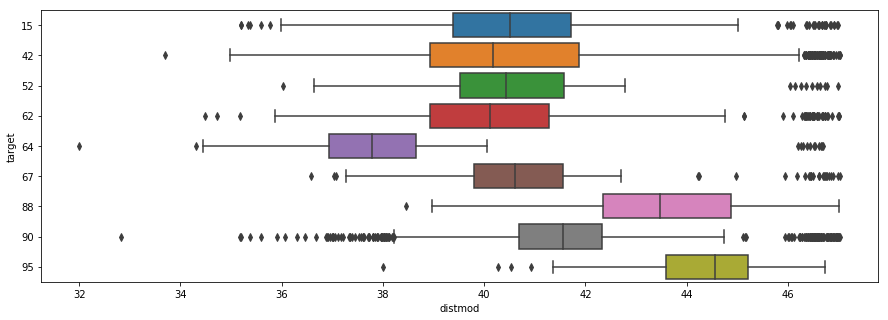

In [12]:
#Distmod is also only for extragalactic objects
plt.figure(figsize=[15,5])
sns.boxplot(y='target', x='distmod', data=extragal, orient='h')
plt.show()

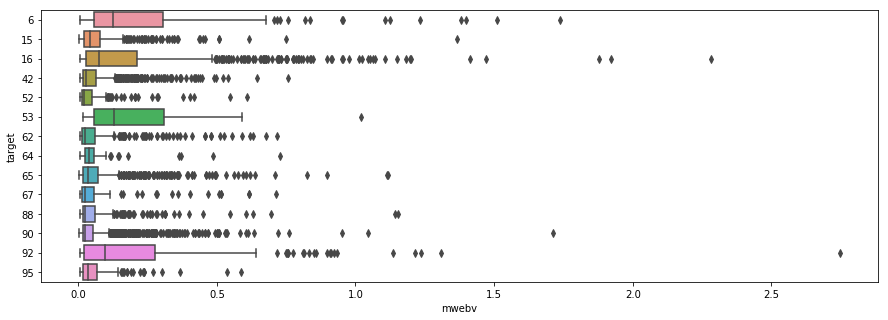

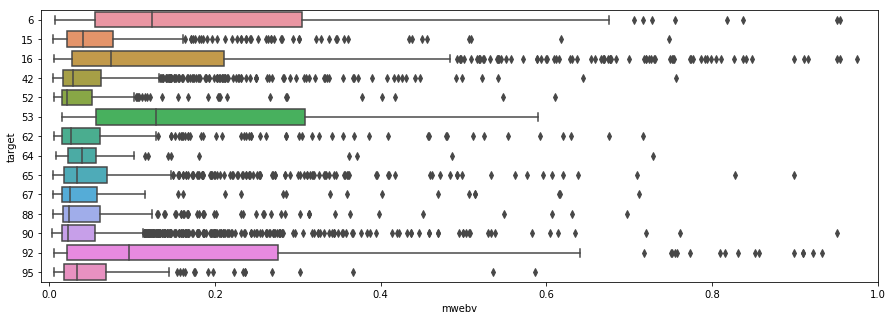

In [13]:
#examining mwebv:
plt.figure(figsize=[15,5])
sns.boxplot(y='target', x='mwebv', data=meta, orient='h')
plt.show()
#Let's try that again without the wasted space for outliers
plt.figure(figsize=[15,5])
sns.boxplot(y='target', x='mwebv', data=meta, orient='h')
plt.xlim(-.01,1)
plt.show()

In [14]:
#Let's load the timeseries data now:
df = pd.read_csv('training_set.csv')
display(df.shape)
df.head(20)

(1421705, 6)

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
5,615,59752.4147,1,-1061.457031,6.472994,1
6,615,59752.4224,3,-524.954590,3.552751,1
7,615,59752.4334,4,-393.480225,3.599346,1
8,615,59752.4435,5,-355.886780,10.421921,1
9,615,59767.2968,2,-548.013550,3.462291,1


In [15]:
df.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


In [16]:
#merge in metadata
df = df.merge(meta, how='inner', on='object_id')
display(df.shape)
df.head()

(1421705, 18)

,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,extragal
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,0
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,0
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,0
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,0
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,0


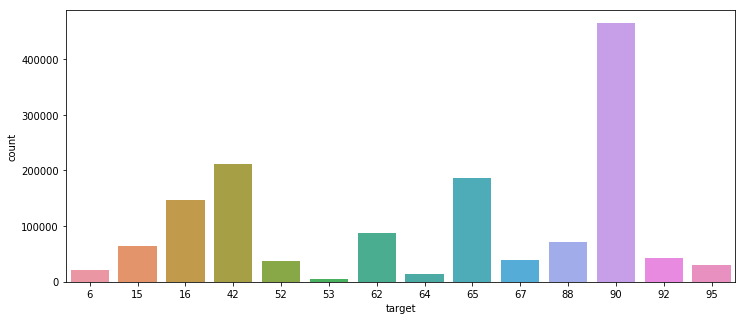

In [17]:
#Class imbalance?
plt.figure(figsize=[12,5])
sns.countplot(x='target', data=df)
plt.show()
#Clearly!

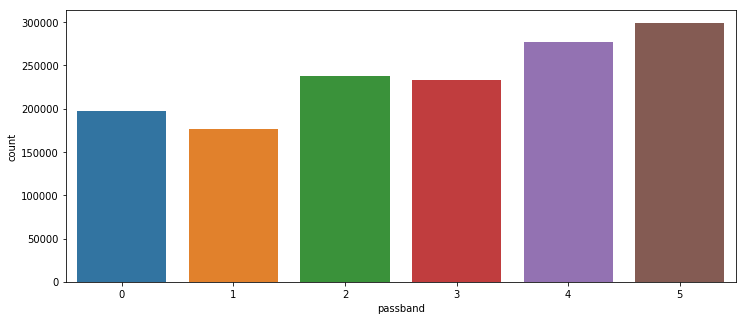

In [18]:
#passband imbalance?
plt.figure(figsize=[12,5])
sns.countplot(x='passband', data=df)
plt.show()
#probably neglible

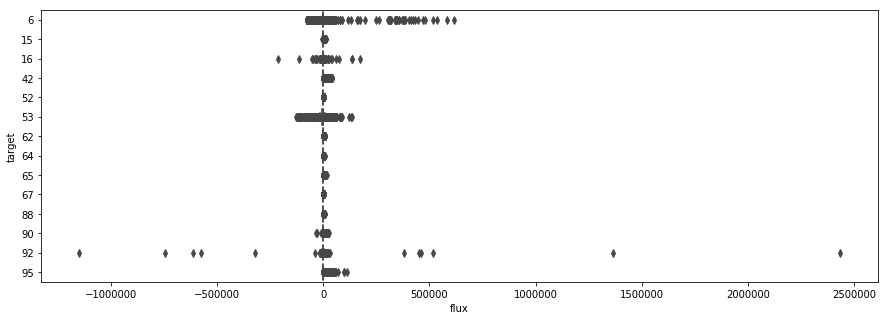

In [19]:
#flux measurements, disregarding passband (this may not even be valid to do)
plt.figure(figsize=[15,5])
sns.boxplot(y='target', x='flux', data=df, orient='h')
plt.show()


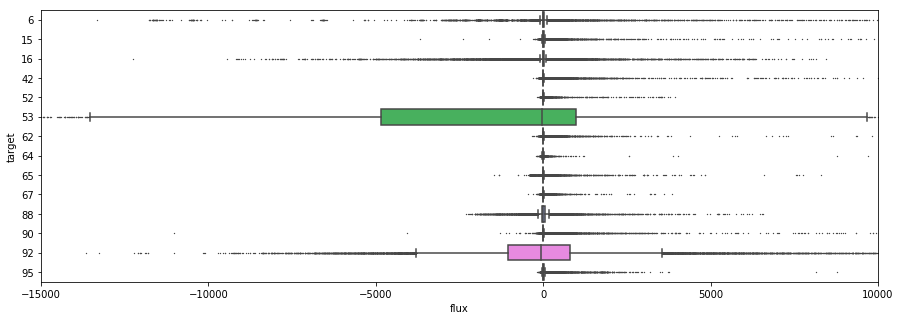

In [20]:
#try again muting/hiding crazy outliers
plt.figure(figsize=[15,5])
sns.boxplot(y='target', x='flux', data=df, orient='h', fliersize=.5)
plt.xlim(-15000,10000)
plt.show()

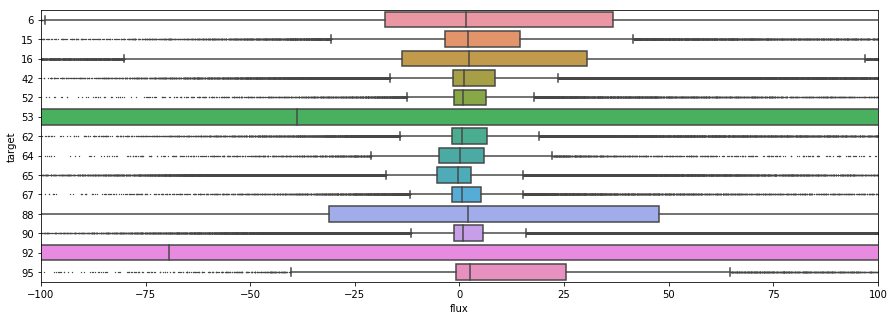

In [21]:
#one more zoom to capture around zero
plt.figure(figsize=[15,5])
sns.boxplot(y='target', x='flux', data=df, orient='h', fliersize=.5)
plt.xlim(-100,100)
plt.show()

In [22]:
#That may not be a productive avenue, and in fact may not even be valid. Further explorations should filter by passband first:

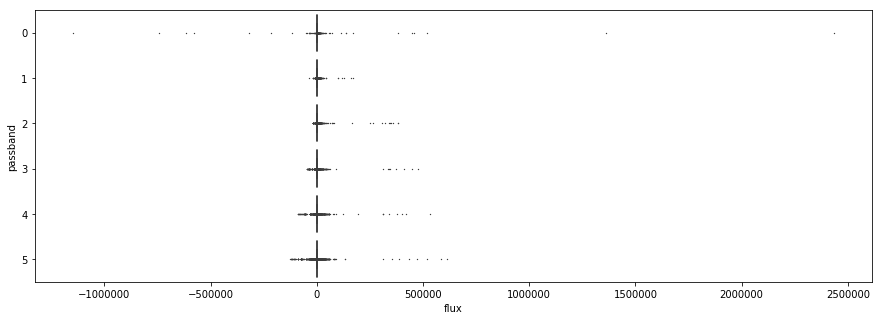

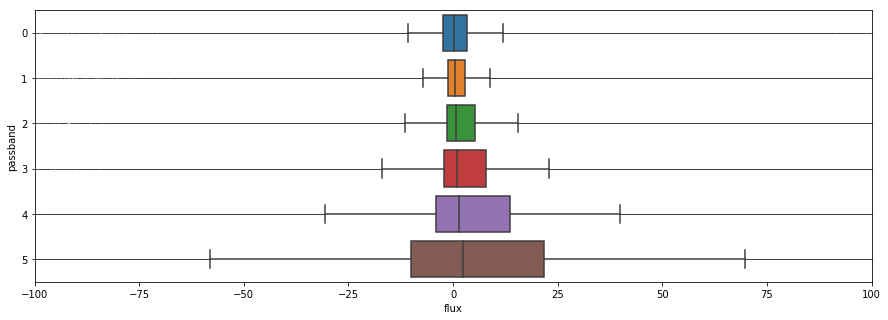

In [23]:
plt.figure(figsize=[15,5])
sns.boxplot(y='passband', x='flux', data=df, orient='h', fliersize=.5)
plt.show()
plt.figure(figsize=[15,5])
sns.boxplot(y='passband', x='flux', data=df, orient='h', fliersize=.1)
plt.xlim(-100,100)
plt.show()

In [24]:
#The DDF (Deep Drilling Field) provides a much more manageable error for the flux measurements

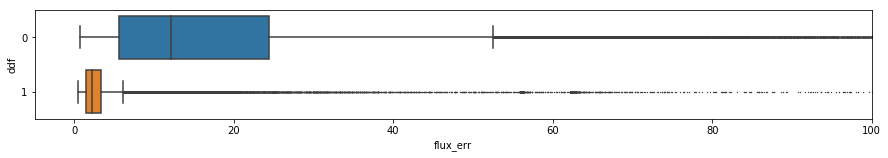

In [25]:
plt.figure(figsize=[15,2])
sns.boxplot(y='ddf', x='flux_err', data=df, orient='h', fliersize=.5)
plt.xlim(-5,100)
plt.show()

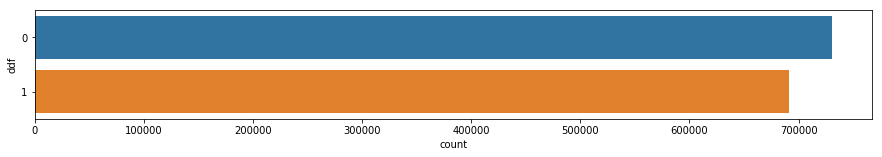

In [26]:
#But although this training data is about evenly split, that's not the case with the test data (per the codebook), 
#which will be mostly non-DDF
plt.figure(figsize=[15,2])
sns.countplot(y='ddf', data=df)
plt.show()

# A next-level visualization source
https://www.kaggle.com/mithrillion/all-classes-light-curve-characteristics-updated  
This kaggle kernel by Mithrillion uses some domain-specific knowledge to draw out an amazing mount of order form the seemingly chaotic flux measurements.

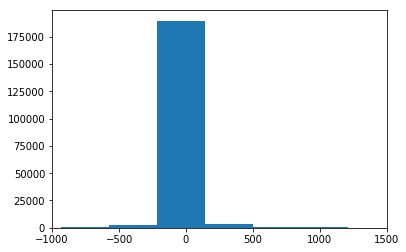

In [37]:
dfu = df[df.passband == 0]
plt.hist(dfu['flux'], bins=10000)
plt.xlim(-1000,1500)
plt.show()

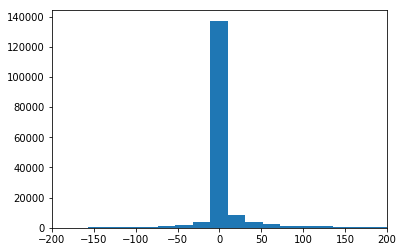

In [56]:
dfg = df[df.passband == 1]
plt.hist(dfg['flux'], bins=10000)
plt.xlim(-200,200)
plt.show()

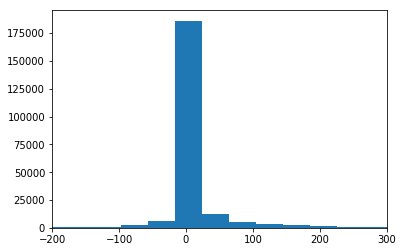

In [54]:
dfr = df[df.passband == 2]
plt.hist(dfr['flux'], bins=10000)
plt.xlim(-200,300)
plt.show()

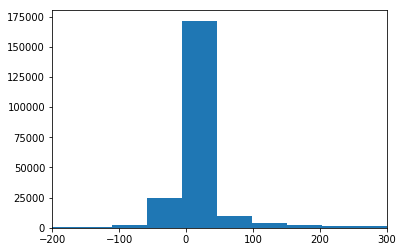

In [52]:
dfi = df[df.passband == 3]
plt.hist(dfi['flux'], bins=10000)
plt.xlim(-200,300)
plt.show()

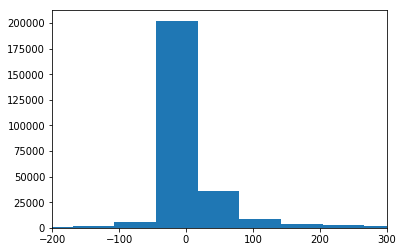

In [53]:
dfz = df[df.passband == 4]
plt.hist(dfz['flux'], bins=10000)
plt.xlim(-200,300)
plt.show()

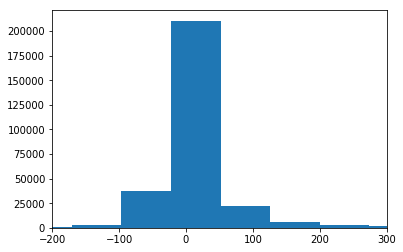

In [55]:
dfy = df[df.passband == 5]
plt.hist(dfy['flux'], bins=10000)
plt.xlim(-200,300)
plt.show()